In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import GPy
import numpy as np

In [37]:
m.preferred_optimizer

'lbfgsb'

In [116]:
ms = []
for it in range(100):
    X = np.random.rand(20,1)
    Y = np.sin(X)+0.1*np.random.randn(X.shape[0],1)
    m = GPy.models.GPRegression(X,Y)
    #m.preferred_optimizer = 'scg'
    ms.append(m)

history = []
p = ms[0].param_array
annealing = 1
iterations = 5
for it in range(iterations):
    for m in ms:
        
        m.param_array[:] = p
        m.optimize(max_iters=1)
        
        p = (1-annealing)*p + (annealing)*m.param_array[:]
        history.append(p)
    annealing *= 0.01**(1.0/iterations)
history = np.array(history)
#m.plot()
##m.Gaussian_noise = 7.64e-9
##m.rbf.variance = 0.69777444
##m.rbf.lengthscale = 1.6111953
ms[0].gradient

indp_opts = []
for m in ms:
    m.optimize()
    indp_opts.append(m.param_array[:])
indp_opts = np.array(indp_opts)

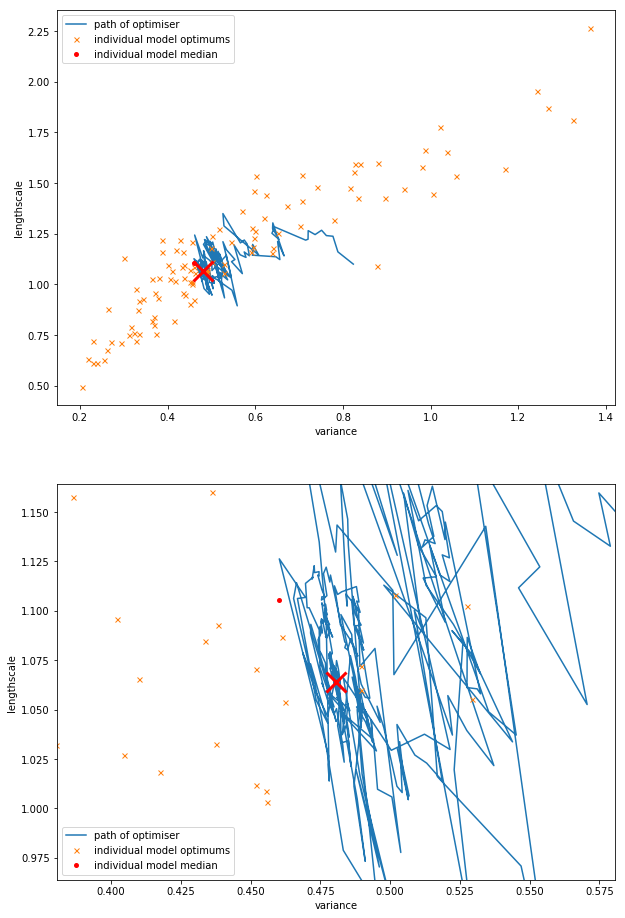

In [129]:
plt.figure(figsize=[10,16])
for p in range(2):
    plt.subplot(2,1,p+1)
    plt.xlabel('variance')
    plt.ylabel('lengthscale')
    plt.plot(history[:,0],history[:,1],label='path of optimiser')
    plt.plot(indp_opts[:,0],indp_opts[:,1],'x',markersize=5,label='individual model optimums')
    plt.plot(history[-1,0],history[-1,1],'rx',mew=3,markersize=20)
    plt.plot(np.median(indp_opts[:,0]),np.median(indp_opts[:,1]),'r.',mew=2,label='individual model median')
    plt.legend()
    
    
    if p==1:
        plt.xlim([history[-1,0]-0.1,history[-1,0]+0.1])
        plt.ylim([history[-1,1]-0.1,history[-1,1]+0.1])        
        #plt.xlim([np.min(indp_opts[:,0]),np.max(indp_opts[:,0])])
        #plt.ylim([np.min(indp_opts[:,1]),np.max(indp_opts[:,1])])